<a href="https://colab.research.google.com/github/user-156/image-classification/blob/main/Cat_vs_Dog_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import glob

In [ ]:
!wget https://www.dropbox.com/s/alw4wehyx8gxb1j/dogs-vs-cats.zip?dl=0
!unzip /content/dogs-vs-cats.zip?dl=0

!unzip /content/train.zip
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
TRAIN_DIR = "./DATASE"

ORG_DIR = "/content/train"

CLASS = ['cat','dog']

In [ ]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  #if directory is not present then create one
  if not os.path.exists( DEST ):
    os.makedirs(DEST)


  for img_path in glob.glob(os.path.join(ORG_DIR , C)+"*" ):
    SRC = img_path

    shutil.copy(SRC ,DEST)

# Model Building

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=2 , activation= 'sigmoid')(X)

# Final Model
model = Model(base_model.input , X)

# compile the model
model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Pre-Process data using Data Generator

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center= True ,
                                   rotation_range= 0.4,
                                   width_shift_range= 0.3 ,
                                   horizontal_flip= True,
                                   preprocessing_function= preprocess_input ,
                                   zoom_range= 0.4 ,
                                   shear_range= 0.4)

train_data = train_datagen.flow_from_directory(directory= "/content/DATASE",
                                               target_size=(256,256),
                                               batch_size= 64)

Found 25000 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cat': 0, 'dog': 1}

# Visualizing the data

In [ ]:
t_img , label = train_data.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
def plotImages(img_arr , label):
  """
  input : image array
  output : plot images
  """

  for idx , img in enumerate( img_arr ):

    if idx <= 10 :

      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


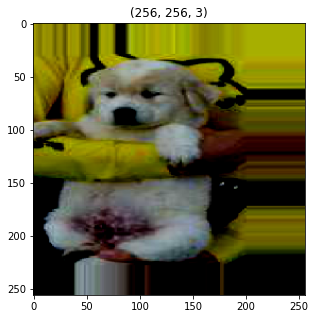

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


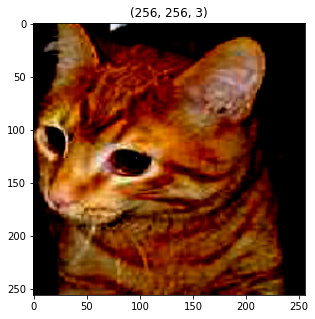

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


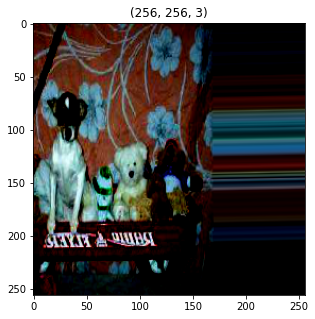

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


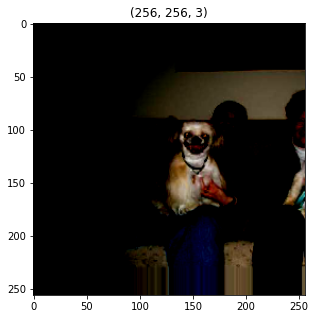

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


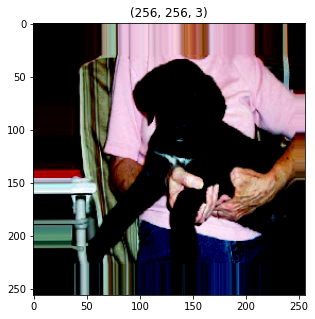

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


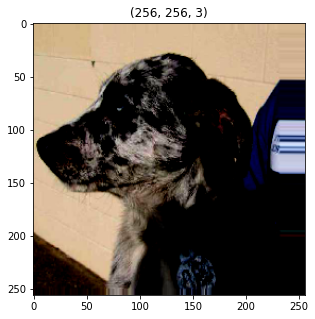

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


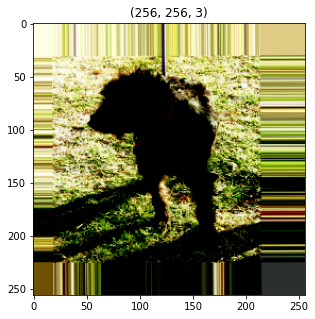

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


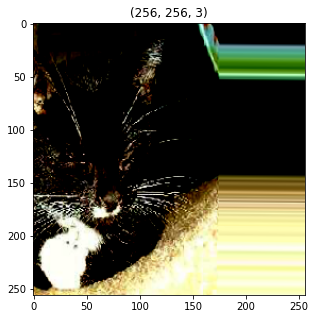

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


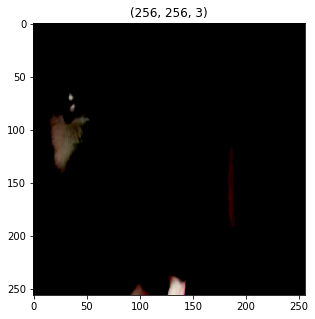

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


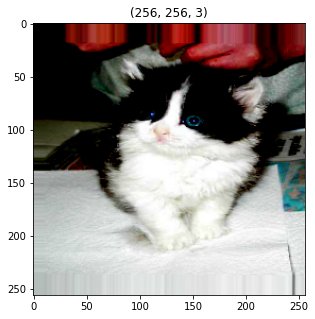

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


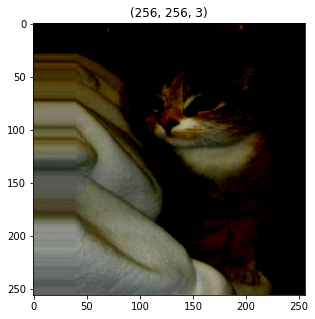

In [ ]:
plotImages(t_img , label)

# Model Check Point

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc = ModelCheckpoint(filepath= "./best_model.h5" ,
                     monitor= "accuracy",
                     verbose= 1 ,
                     save_best_only= True)

es = EarlyStopping(monitor= "accuracy",
                   min_delta= 0.01,
                   patience= 5,
                   verbose= 1)

cb = [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch= 10,
                          epochs = 30,
                          callbacks= cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.9094
Epoch 1: accuracy improved from -inf to 0.90938, saving model to ./best_model.h5
10/10 [==============================] - 26s 1s/step - loss: 0.4340 - accuracy: 0.9094
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.9656
Epoch 2: accuracy improved from 0.90938 to 0.96562, saving model to ./best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.3009 - accuracy: 0.9656
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9750
Epoch 3: accuracy improved from 0.96562 to 0.97500, saving model to ./best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.1931 - accuracy: 0.9750
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9734
Epoch 4: accuracy did not improve from 0.97500
10/10 [==============================] - 10s 973ms/step - loss: 0.2

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

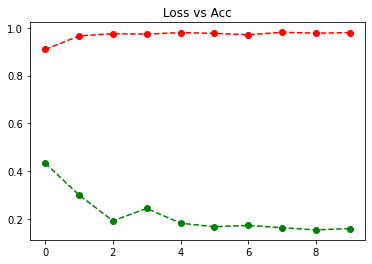

In [ ]:
plt.plot(h['loss'] , 'go--')
plt.plot(h['accuracy'] , 'go--' , c = "red" , )

plt.title("Loss vs Acc")
plt.show()

# Validate our model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of dog 


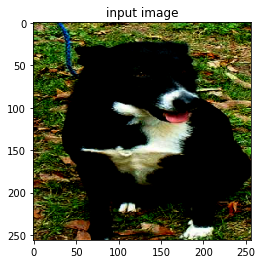

In [ ]:
# path for the image to see if it predics correct class

path = "/content/test1/1000.jpg"
img = load_img(path, target_size=(256,256) )

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The image is of cat ")
else:
  print("The image is of dog ")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of cat 


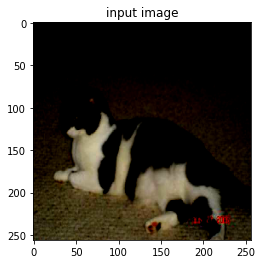

In [ ]:
path = "/content/test1/1870.jpg"
img = load_img(path, target_size=(256,256) )

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The image is of cat ")
else:
  print("The image is of dog ")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()